## Лабораторная работа 10
#### Выполнил: Граур Арсений `5130901/10203`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ThinkDSP.code.thinkdsp import decorate

### Упражнение 1

В разделе "Акустическая характеристика" умножение дискретного преобразования Фурье (ДПФ) сигнала на передаточную функцию эквивалентно круговой свертке, но с предположением периодичности сигнала. В результате этого можно заметить, что на выходе, в начале фрагмента, слышна дополнительная нота, которая "затекает" из конца этого фрагмента.

Чтобы устранить эту проблему, необходимо перед вычислением ДПФ добавить достаточное количество нулей в конец сигнала. Таким образом, можно избежать эффекта "заворота". Например, мы можем обрезать оба сигнала до размера $2^{16}$ и добавить по нулю до размера $2^{17}$.

Возьмем звук выстрела

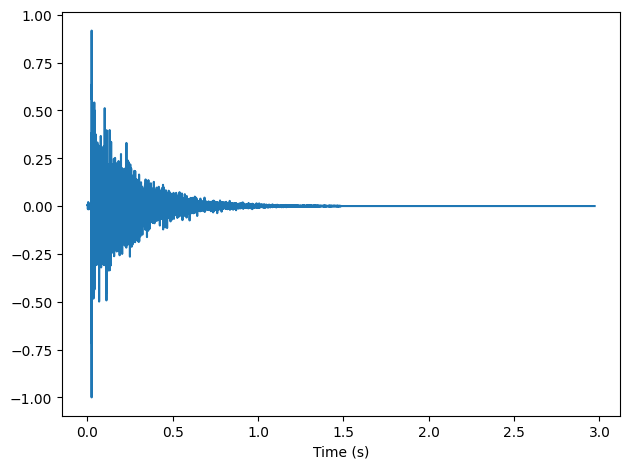

In [2]:
from ThinkDSP.code.thinkdsp import read_wave

response = read_wave('ThinkDSP/code/180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

Спектр

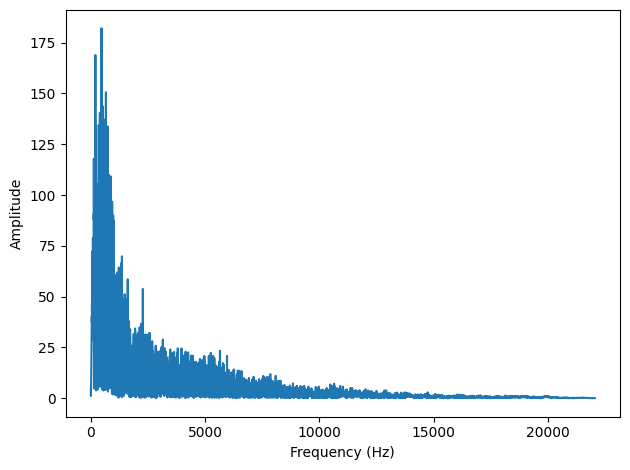

In [3]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Теперь звук скрипки

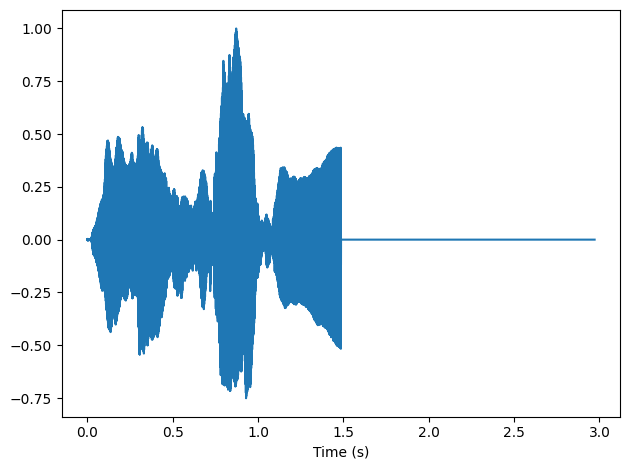

In [4]:
violin = read_wave('ThinkDSP/code/92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

Ее спектр

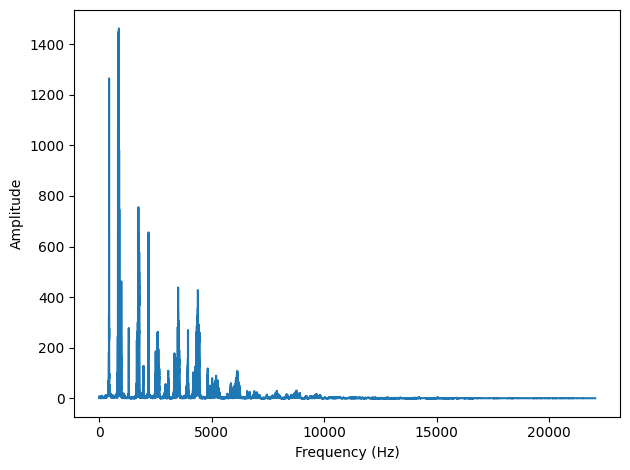

In [6]:
spectrum = violin.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Теперь мы умножим дискретное преобразование Фурье (ДПФ) сигнала на передаточную функцию и преобразуем результат обратно во временной домен, получив волну.

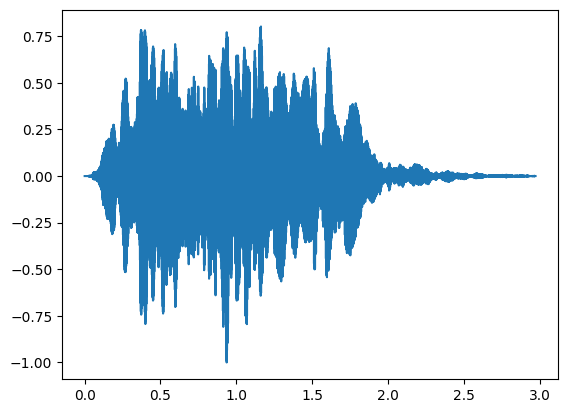

In [8]:
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()
output.make_audio()

Из результатов видно, что проблему с лишней ноту удалось решить.

### Упражнение 2

Смоделируем, как будет звучать запись, если она будет воспроизводиться в комнате.

Возьмем impulse response

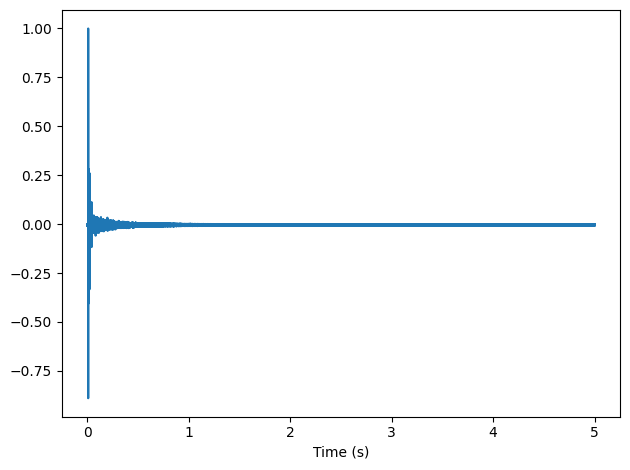

In [9]:
response = read_wave('ThinkDSP/code/stalbans_a_mono.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

In [10]:
response.make_audio()

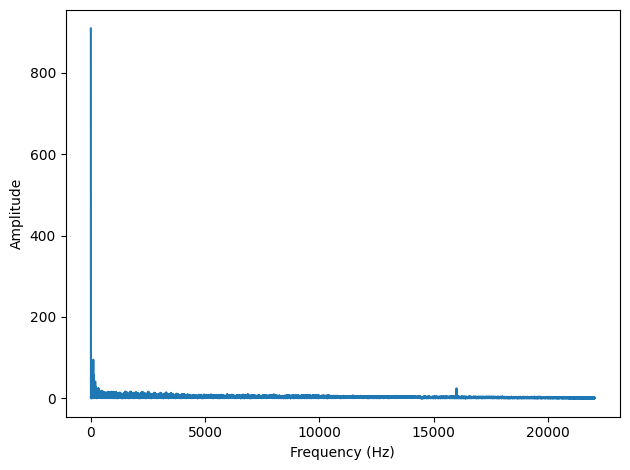

In [11]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Теперь мы можем симулировать звук так если бы он находился в том же самом помещении где был записан impulse response

Звук до трансформации

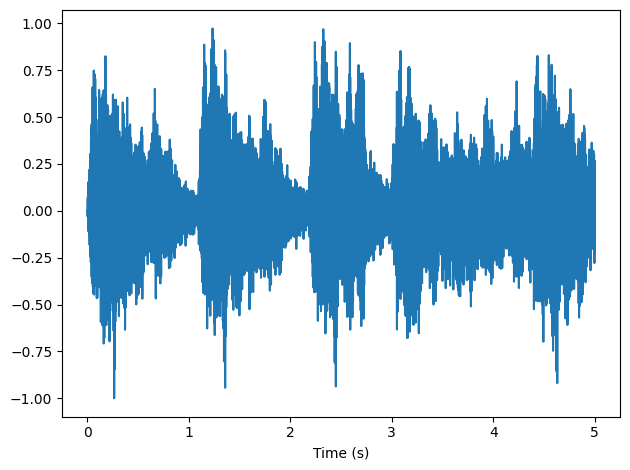

In [13]:
wave = read_wave('ThinkDSP/code/170255__dublie__trumpet.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')
wave.make_audio()

In [17]:
spectrum = wave.make_spectrum()
output = (spectrum * transfer).make_wave()
output.normalize()

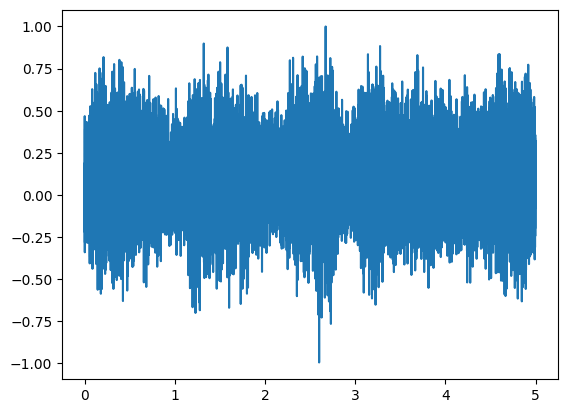

In [18]:
output.plot()

Результат

In [19]:
output.make_audio()